In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Reads in the "Coding Files" folder from Google Drive:
# 'Cross-National Data Collection/PAL Data and Coding/Coding Files'
from os import listdir
country_files = listdir('Coding Files')
country_files

['.DS_Store',
 '.ipynb_checkpoints',
 'Argentina.xlsx',
 'Belize.xlsx',
 'Bolivia.xlsx',
 'Brazil.xlsx',
 'Chile.xlsx',
 'Colombia.xlsx',
 'Costa Rica.xlsx',
 'Cuba.xlsx',
 'Dominican Republic.xlsx',
 'Ecuador.xlsx',
 'El Salvador.xlsx',
 'Guatemala.xlsx',
 'Guyana.xlsx',
 'Haiti.xlsx',
 'Honduras.xlsx',
 'Jamaica.xlsx',
 'Mexico.xlsx',
 'Nicaragua.xlsx',
 'Panama.xlsx',
 'Paraguay.xlsx',
 'Peru.xlsx',
 'Suriname.xlsx',
 'Template.xlsx',
 'Uruguay.xlsx',
 'Venezuela.xlsx',
 '~$Uruguay.xlsx']

In [28]:
# drop any ~${country}.xlsx files, '.DS_Store', and the Template.xlsx file
try:
    country_files.remove('Template.xlsx')
    country_files.remove('.DS_Store')
    country_files.remove('.ipynb_checkpoints')
    country_files.remove('~$Uruguay.xlsx')
except:
    print(country_files)

In [30]:
# merge into one dataframe
df = pd.DataFrame()

for i in country_files:
    data = pd.read_excel('Coding Files/' + i, 'police_force_level_variables')
    df = pd.concat([df, data])

In [32]:
df

,coder,country,ccode,year,police_org_id,police_org_name,police_org_name_source,antecedent,antecedent_source,year_start,...,police_military_joint,police_military_joint_source,civilians_killed_fy,civilians_killed_fy_source,police_killed_fy,police_killed_fy_source,police_courts,police_courts_source,police_oversight,police_oversight_source
0,Daniel,Argentina,160.0,1970.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daniel,Argentina,160.0,1971.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daniel,Argentina,160.0,1972.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daniel,Argentina,160.0,1973.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Daniel,Argentina,160.0,1974.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Daniel,Venezuela,101.0,2016.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,Daniel,Venezuela,101.0,2017.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,Daniel,Venezuela,101.0,2018.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,Daniel,Venezuela,101.0,2019.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Police size aggregated by country

# filter only data where police_size not null
# also Jurisdiction == 2 (National ONLY)
df_police_size = df[df['police_size'].notnull() & (df['police_size'] != -999) & (df['police_size'] != 0) & ( (df['police_jurisdiction'] == 2))]
#coerce police_size to numeric (a couple irregular entries)
df_police_size['police_size'] = pd.to_numeric(df_police_size['police_size'],  errors='coerce')

#group by country and year
size_country_year = df_police_size.groupby(['country', 'year'])['police_size'].sum().to_frame(name = 'police_size').reset_index()
size_country_year

C:\Users\gaoli\AppData\Local\Temp\ipykernel_20708\428066844.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_police_size['police_size'] = pd.to_numeric(df_police_size['police_size'],  errors='coerce')


,country,year,police_size
0,Argentina,2001.0,38686.0
1,Argentina,2003.0,55104.0
2,Argentina,2004.0,55604.0
3,Argentina,2005.0,63404.0
4,Argentina,2006.0,68801.0
...,...,...,...
446,Venezuela,2012.0,8277.0
447,Venezuela,2013.0,18124.0
448,Venezuela,2014.0,22474.0
449,Venezuela,2015.0,25231.0


In [36]:
df_budget= df[df['police_budget'].notnull() & (df['police_budget'] != -999) & (df['police_budget'] != 0) & ((df['police_jurisdiction'] == 2))]
df_budget['police_budget'] = pd.to_numeric(df_budget['police_budget'],  errors='coerce')
budget_by_year = df_budget.groupby(['country', 'year'])['police_budget'].sum().to_frame(name = 'police_budget').reset_index()
budget_by_year["country"] = budget_by_year["country"].replace("Colombia ", "Colombia")
budget_by_year["country"] = budget_by_year["country"].replace("Paraguay ", "Paraguay")
budget_by_year

C:\Users\gaoli\AppData\Local\Temp\ipykernel_20708\3163443919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget['police_budget'] = pd.to_numeric(df_budget['police_budget'],  errors='coerce')


,country,year,police_budget
0,Argentina,2001.0,1.228394e+09
1,Argentina,2003.0,1.450541e+09
2,Argentina,2004.0,1.787036e+09
3,Argentina,2005.0,2.017677e+09
4,Argentina,2006.0,2.469908e+09
...,...,...,...
387,Uruguay,2019.0,2.897713e+10
388,Uruguay,2020.0,3.219455e+10
389,Uruguay,2021.0,3.468098e+10
390,Uruguay,2022.0,3.901084e+10


In [38]:
# Exclude Guardia Republicana and Policia Caminera
# uruguay_updated = df_budget[(df_budget["country"] == "Uruguay") & (df_budget["police_org_name"] != "Guardia Republicana") & (df_budget["police_org_name"] != "Policía Caminera")]
# uruguay_updated = uruguay_updated.groupby(['country', 'year'])['police_budget'].sum().to_frame(name = 'police_budget').reset_index()
# uruguay_updated

In [40]:
country_codes = ['ARG', 'BLZ','BOL','CHL','COL','CRI','DOM','ECU','SLV','GTM',
    'GUY','HTI','HND','JAM','MEX','NIC','PRY','PER','SUR','URY','VEN']

country_iso_mapping = {
    "Argentina": "AR", "Belize": "BZ", "Bolivia": "BO", "Chile": "CL", "Colombia": "CO", "Costa Rica": "CR",
    "Dominican Republic": "DO", "Ecuador": "EC", "El Salvador": "SV", "Guatemala": "GT", "Guyana": "GY",
    "Haiti": "HT", "Honduras": "HN", "Jamaica": "JM", "Mexico": "MX", "Nicaragua": "NI", "Paraguay": "PY",
    "Peru": "PE", "Suriname": "SR", "Uruguay": "UY", "Venezuela": "VE"}

In [42]:
import requests

# Fetch exchange rates data by year and country from World Bank
def fetch_exchange_rate(country_code, start_year, end_year):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/PA.NUS.FCRF?date={start_year}:{end_year}&format=json&per_page=1000"
    response = requests.get(url)
    data = response.json()
    return [
        {
            "year": entry['date'],
            "exchange_rate": entry['value']
        } for entry in data[1] if entry['value'] is not None
    ]
exchange_rates = []
for country in country_iso_mapping:
    two_letter_code = country_iso_mapping[country]
    rates = fetch_exchange_rate(two_letter_code, 1970, 2023)
    for rate in rates:
        exchange_rates.append({"country": country, "year": int(rate['year']), "exchange_rate": rate['exchange_rate']})
exchange_rate_df = pd.DataFrame(exchange_rates)

In [43]:
# Merge budget data with exchange rates on 'country' and 'year'
budget_usd = budget_by_year.merge(exchange_rate_df, on=['country', 'year'])
budget_usd['police_budget_usd'] = budget_usd['police_budget'] / budget_usd['exchange_rate']
budget_usd.head()

,country,year,police_budget,exchange_rate,police_budget_usd
0,Argentina,2001.0,1.228394e+09,0.999500,1.229009e+09
1,Argentina,2003.0,1.450541e+09,2.900629,5.000782e+08
2,Argentina,2004.0,1.787036e+09,2.923301,6.113077e+08
3,Argentina,2005.0,2.017677e+09,2.903658,6.948744e+08
4,Argentina,2006.0,2.469908e+09,3.054313,8.086622e+08


In [50]:
# uruguay_budget_usd = uruguay_updated.merge(exchange_rate_df, on=['country', 'year'])
# uruguay_budget_usd['police_budget_usd'] = uruguay_budget_usd['police_budget'] / uruguay_budget_usd['exchange_rate']
# uruguay_budget_usd.head()

In [52]:
import wbdata
import datetime

# Define the indicator (total population)
indicator = {'SP.POP.TOTL': 'Population', 'NY.GDP.MKTP.CD': 'GDP'}

# Fetch the data for a country's population from the World Bank
total_pop = wbdata.get_dataframe(indicator, country=country_codes, date=("1970", "2023"))
# Sort the data by year in increasing order
total_pop = total_pop.sort_values(by='date').reset_index()
total_pop['country'] = total_pop['country'].replace('Venezuela, RB', 'Venezuela')
total_pop['date'] = total_pop['date'].astype('float')
total_pop

,country,date,Population,GDP
0,Venezuela,1970.0,11355475.0,1.156111e+10
1,Costa Rica,1970.0,1855697.0,9.848302e+08
2,Nicaragua,1970.0,2444767.0,NaN
3,Argentina,1970.0,23842803.0,NaN
4,Uruguay,1970.0,2790265.0,2.137097e+09
...,...,...,...,...
1129,Bolivia,2023.0,12388571.0,4.584983e+10
1130,Jamaica,2023.0,2825544.0,1.942336e+10
1131,Venezuela,2023.0,28838499.0,NaN
1132,Haiti,2023.0,11724763.0,1.985083e+10


In [54]:
size_country_year["country"] = size_country_year["country"].replace("Colombia ", "Colombia")
size_country_year["country"] = size_country_year["country"].replace("Paraguay ", "Paraguay")

In [56]:
merged = size_country_year.merge(total_pop, how = "inner", left_on = ['country', 'year'], right_on = ['country', 'date'])

# Add a column that calculates police per capita
# police per capita = (number of police officers/total population)*100,000
merged['police_per_capita'] = np.round(merged['police_size'] / merged['Population'] * 100000, 2)
merged['GDP_per_capita'] = np.round(merged['GDP'] / merged['Population'], 2)
merged.drop(columns=['date', 'Population', 'GDP'], inplace=True)
merged

,country,year,police_size,police_per_capita,GDP_per_capita
0,Argentina,2001.0,38686.0,103.22,7168.98
1,Argentina,2003.0,55104.0,143.96,3333.15
2,Argentina,2004.0,55604.0,143.80,4258.16
3,Argentina,2005.0,63404.0,162.28,5086.63
4,Argentina,2006.0,68801.0,174.28,5890.98
...,...,...,...,...,...
446,Venezuela,2012.0,8277.0,28.09,12937.93
447,Venezuela,2013.0,18124.0,60.74,12433.98
448,Venezuela,2014.0,22474.0,74.43,15975.73
449,Venezuela,2015.0,25231.0,82.64,NaN


In [62]:
# fill NaN GDP with previous data (fix Venezuela missing GDP issue)
merged = merged.fillna(method='ffill')

C:\Users\gaoli\AppData\Local\Temp\ipykernel_20708\3529243670.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged = merged.fillna(method='ffill')


In [64]:
merged_budget = budget_usd.merge(total_pop[["country", "date", "GDP", "Population"]], left_on = ['country', 'year'], right_on = ['country', 'date'])
merged_budget['GDP_per_capita'] = np.round(merged_budget['GDP'] / merged_budget['Population'], 2)
merged_budget['police_budget_usd_per_capita'] = np.round(merged_budget['police_budget_usd'] / merged_budget['Population'], 2)
merged_budget.drop(columns=['date', 'exchange_rate', 'GDP', 'Population'], inplace=True)
merged_budget

,country,year,police_budget,police_budget_usd,GDP_per_capita,police_budget_usd_per_capita
0,Argentina,2001.0,1.228394e+09,1.229009e+09,7168.98,32.79
1,Argentina,2003.0,1.450541e+09,5.000782e+08,3333.15,13.06
2,Argentina,2004.0,1.787036e+09,6.113077e+08,4258.16,15.81
3,Argentina,2005.0,2.017677e+09,6.948744e+08,5086.63,17.79
4,Argentina,2006.0,2.469908e+09,8.086622e+08,5890.98,20.48
...,...,...,...,...,...,...
387,Uruguay,2019.0,2.897713e+10,8.219209e+08,18149.06,239.74
388,Uruguay,2020.0,3.219455e+10,7.662945e+08,15651.00,223.47
389,Uruguay,2021.0,3.468098e+10,7.962650e+08,17733.86,232.40
390,Uruguay,2022.0,3.901084e+10,9.475300e+08,20499.24,276.83


In [68]:
# merged_uruguay_budget = uruguay_budget_usd.merge(total_pop[["country", "date", "GDP", "Population"]], left_on = ['country', 'year'], right_on = ['country', 'date'])
# merged_uruguay_budget['GDP_per_capita'] = np.round(merged_uruguay_budget['GDP'] / merged_uruguay_budget['Population'], 2)
# merged_uruguay_budget['police_budget_usd_per_capita'] = np.round(merged_uruguay_budget['police_budget_usd'] / merged_uruguay_budget['Population'], 2)
# merged_uruguay_budget.drop(columns=['date', 'exchange_rate', 'GDP', 'Population'], inplace=True)
# merged_uruguay_budget

In [70]:
comparable_countries = ["Argentina", "Belize", "Chile", "Colombia", "Costa Rica", "Dominican Republic", "Ecuador",
                        "El Salvador", "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica", "Mexico",
                        "Nicaragua", "Peru", "Uruguay", "Venezuela"]
comparable_police_size = merged[merged['country'].isin(comparable_countries)]
comparable_police_size.head()

,country,year,police_size,police_per_capita,GDP_per_capita
0,Argentina,2001.0,38686.0,103.22,7168.98
1,Argentina,2003.0,55104.0,143.96,3333.15
2,Argentina,2004.0,55604.0,143.80,4258.16
3,Argentina,2005.0,63404.0,162.28,5086.63
4,Argentina,2006.0,68801.0,174.28,5890.98


In [72]:
most_recent_data = comparable_police_size.loc[comparable_police_size.groupby('country')['year'].idxmax()].reset_index().drop("index", axis=1)
most_recent_data = most_recent_data.sort_values("police_per_capita", ascending=False)
most_recent_data.head()

,country,year,police_size,police_per_capita,GDP_per_capita
16,Uruguay,2023.0,30037.0,877.48,22564.53
1,Belize,2021.0,2539.0,634.70,6060.97
9,Guyana,2019.0,4956.0,620.47,6477.30
12,Jamaica,2020.0,12000.0,425.47,4897.26
15,Peru,2022.0,131726.0,386.87,7239.11


In [74]:
# manually change Chile to 2022
most_recent_data = most_recent_data[most_recent_data['country'] != 'Chile']

chile_2022 = merged[(merged['year']  == 2022) & (merged['country']  == 'Chile')]

most_recent_data = pd.concat([most_recent_data, chile_2022])
most_recent_data = most_recent_data.sort_values("police_per_capita", ascending=False)
most_recent_data.head()

,country,year,police_size,police_per_capita,GDP_per_capita
16,Uruguay,2023.0,30037.0,877.48,22564.53
1,Belize,2021.0,2539.0,634.70,6060.97
9,Guyana,2019.0,4956.0,620.47,6477.30
12,Jamaica,2020.0,12000.0,425.47,4897.26
100,Chile,2022.0,77920.0,397.48,15411.17


In [76]:
comparable_countries_budget = ["Belize", "Chile", "Colombia", "Costa Rica", "Dominican Republic", "Ecuador",  "El Salvador", "Guatemala", "Guyana", "Haiti", "Honduras", "Jamaica",  "Nicaragua", "Peru", "Uruguay"]
comparable_budget = merged_budget[merged_budget['country'].isin(comparable_countries_budget)]
comparable_budget

,country,year,police_budget,police_budget_usd,GDP_per_capita,police_budget_usd_per_capita
22,Belize,1999.0,1.442827e+07,7.214134e+06,4283.48,31.00
23,Belize,2000.0,1.545140e+07,7.725700e+06,4720.17,32.14
24,Belize,2001.0,1.775808e+07,8.879040e+06,4708.29,35.79
25,Belize,2002.0,1.854226e+07,9.271131e+06,4844.23,36.22
26,Belize,2003.0,2.482949e+07,1.241475e+07,4937.09,47.03
...,...,...,...,...,...,...
387,Uruguay,2019.0,2.897713e+10,8.219209e+08,18149.06,239.74
388,Uruguay,2020.0,3.219455e+10,7.662945e+08,15651.00,223.47
389,Uruguay,2021.0,3.468098e+10,7.962650e+08,17733.86,232.40
390,Uruguay,2022.0,3.901084e+10,9.475300e+08,20499.24,276.83


In [78]:
most_recent_comparable_budget = comparable_budget.loc[comparable_budget.groupby('country')['year'].idxmax()].reset_index().drop("index", axis=1)
most_recent_comparable_budget = most_recent_comparable_budget.sort_values("police_budget_usd_per_capita", ascending=False)
most_recent_comparable_budget.head()

,country,year,police_budget,police_budget_usd,GDP_per_capita,police_budget_usd_per_capita
14,Uruguay,2023.0,3.238092e+10,8.340457e+08,22564.53,243.65
1,Chile,2023.0,2.402273e+12,2.859622e+09,17093.24,145.68
0,Belize,2021.0,8.828504e+07,4.414252e+07,6060.97,110.35
11,Jamaica,2020.0,4.228533e+10,2.969417e+08,4897.26,105.28
3,Costa Rica,2023.0,2.735445e+11,5.027922e+08,16595.37,96.46


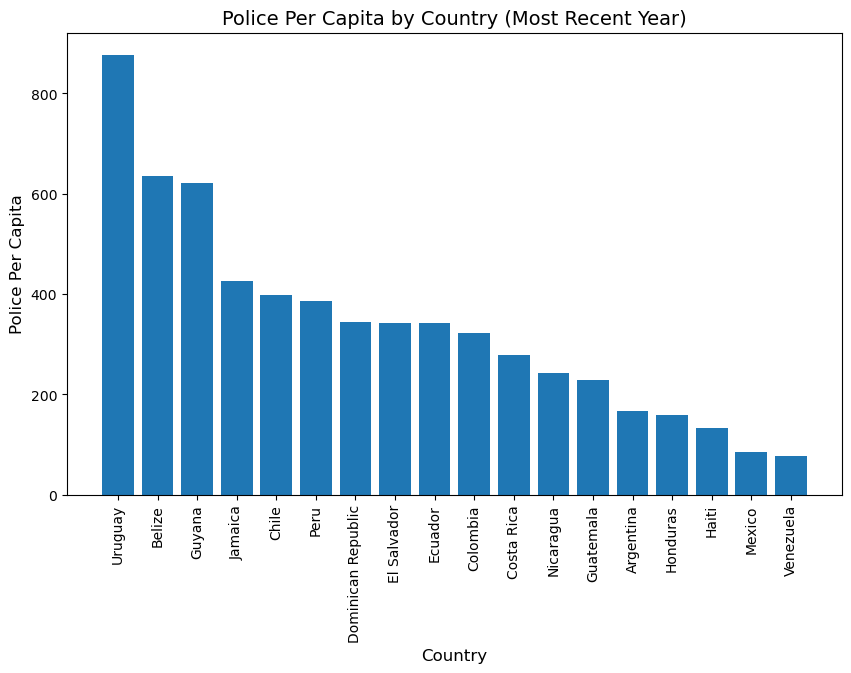

In [80]:
plt.figure(figsize=(10, 6))
plt.bar(most_recent_data['country'], most_recent_data['police_per_capita'])

plt.title('Police Per Capita by Country (Most Recent Year)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Police Per Capita', fontsize=12)
plt.xticks(rotation=90)

plt.show()

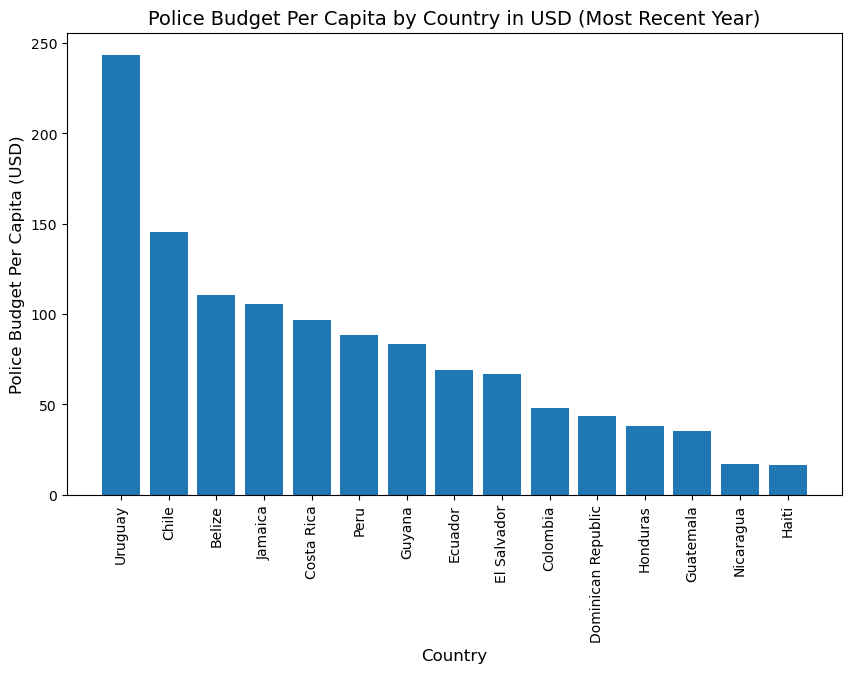

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(most_recent_comparable_budget['country'], most_recent_comparable_budget['police_budget_usd_per_capita'])


plt.title('Police Budget Per Capita by Country in USD (Most Recent Year)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Police Budget Per Capita (USD)', fontsize=12)
plt.xticks(rotation=90)

plt.show()

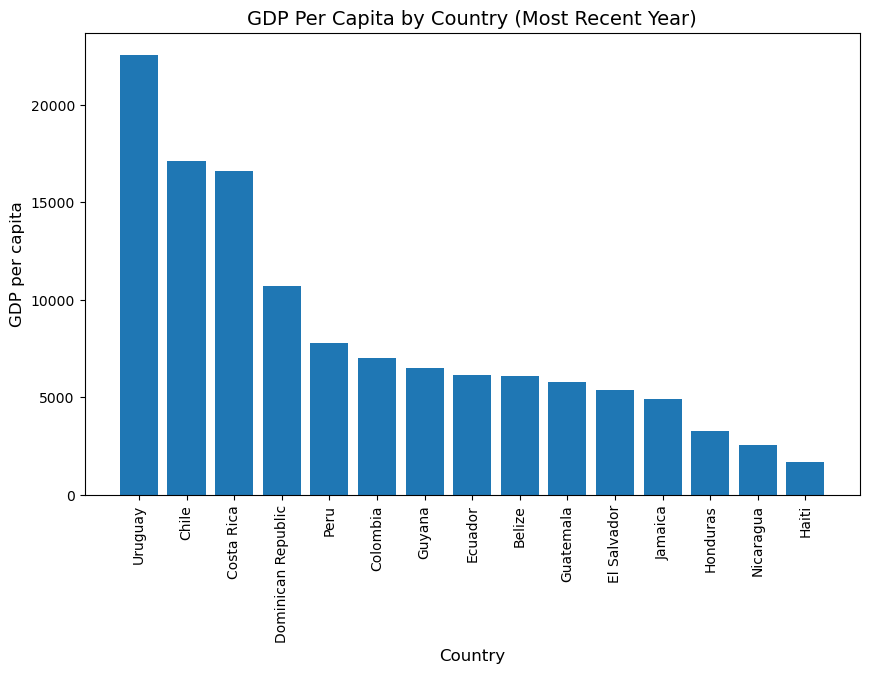

In [86]:
plt.figure(figsize=(10, 6))
plt.bar(most_recent_comparable_budget.sort_values("GDP_per_capita", ascending=False)['country'], most_recent_comparable_budget.sort_values("GDP_per_capita", ascending=False)["GDP_per_capita"])

plt.title('GDP Per Capita by Country (Most Recent Year)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP per capita', fontsize=12)
plt.xticks(rotation=90)

plt.show()

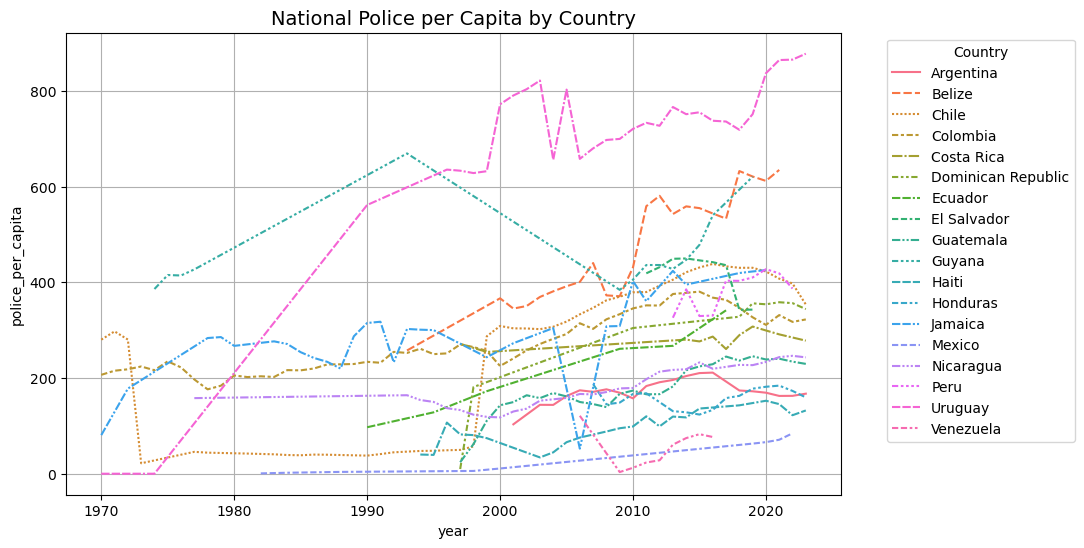

In [88]:
plt.figure(figsize=(10,6))
sns.lineplot(data=comparable_police_size, x='year', y='police_per_capita', hue='country', style='country')
plt.title('National Police per Capita by Country', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

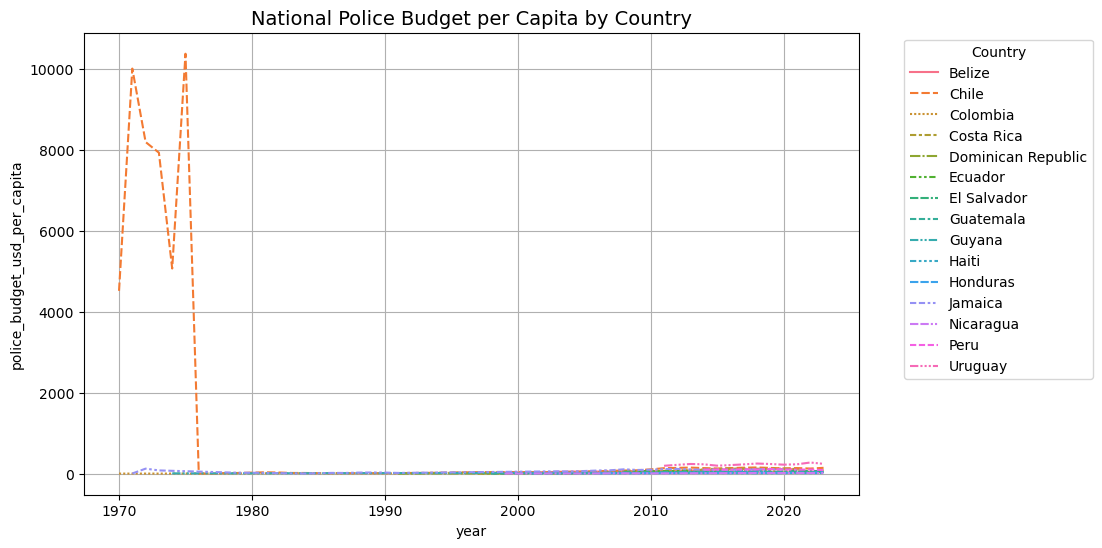

In [90]:
plt.figure(figsize=(10,6))
sns.lineplot(data=comparable_budget, x='year', y='police_budget_usd_per_capita', hue='country', style='country')
plt.title('National Police Budget per Capita by Country', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

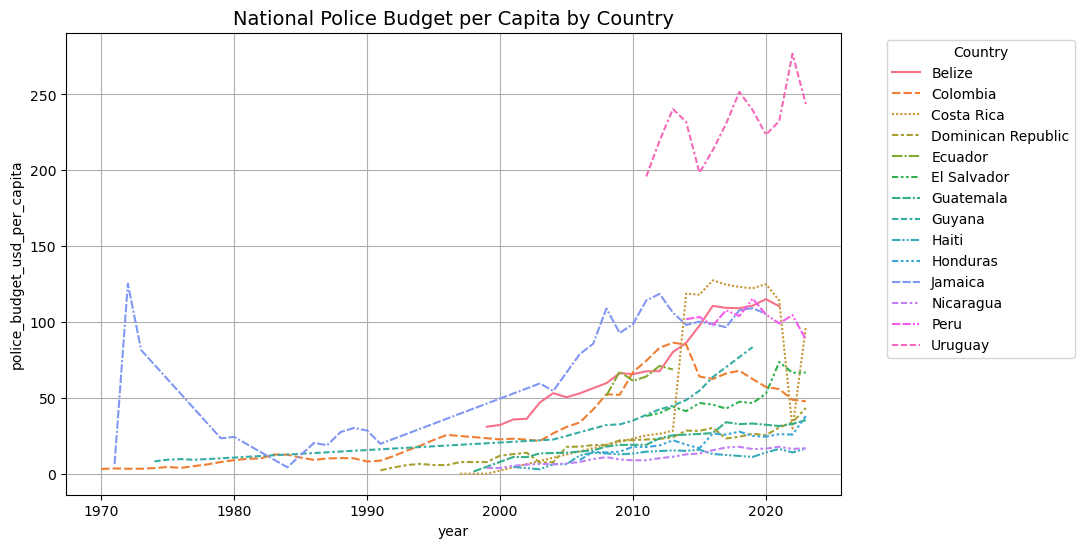

In [92]:
plt.figure(figsize=(10,6))
sns.lineplot(data=comparable_budget[(comparable_budget['country'] != "Chile")].reset_index(), x='year', y='police_budget_usd_per_capita', hue='country', style='country')
plt.title('National Police Budget per Capita by Country', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

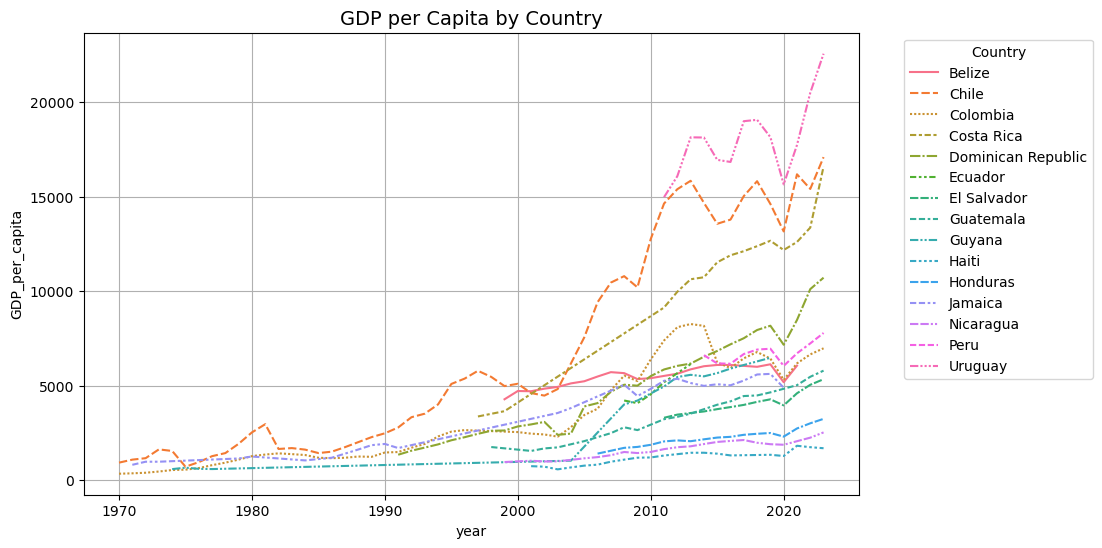

In [96]:
plt.figure(figsize=(10,6))
sns.lineplot(data=comparable_budget, x='year', y='GDP_per_capita', hue='country', style='country')
plt.title('GDP per Capita by Country', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()